# 1. Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [2]:
# url = "https://docs.google.com/spreadsheets/d/1GcYSfR0ox26Tc-7-8AhLA3Pgx2X1o9IKK-WDL5rDNa4/edit#gid=1426969578"
dataset = pd.read_csv('train - train (2).csv')
dataset.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


# Performing EDA

### Collecting info about dataset and Taking care of missing data

In [3]:
dataset.shape

(31527, 11)

In [4]:
dataset.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'hour', 'PM2.5', 'temperature',
       'pressure', 'rain', 'wind_direction', 'wind_speed'],
      dtype='object')

In [5]:
list(dataset.columns)
# list(dataset.columns.values)

# dataset.rows --> no such type of method

['Unnamed: 0',
 'year',
 'month',
 'day',
 'hour',
 'PM2.5',
 'temperature',
 'pressure',
 'rain',
 'wind_direction',
 'wind_speed']

In [6]:
# collecting info about data, how many null or non-null values, what's the data type of the parameters
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  object 
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  object 
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [7]:
# get the number of missing data points per column
dataset.isnull().sum()

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

In [8]:
newdata = dataset
# newdata = dataset.copy()

In [9]:
# removing the unnamed column because it has no use in the problem
newdata.drop("Unnamed: 0", axis = 1, inplace=True)
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,2017,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


In [10]:
newdata['year'].unique()

array(['2013', '201-37', nan, '2014', '2015', '2016', '2017'],
      dtype=object)

### Correcting and cleaning the column - year

In [11]:
newdata.loc[1,'year'] = 2013  # Here I have corrected the wrong data given at row1 in the year column.
# newdata.ffill(inplace=True)

dataset['year'] = pd.to_numeric(dataset['year']) # as from above info function, the year has object datatype 
# but its not  possible so I have changed it to float.
# newdata['year'] = newdata['year'].astype(float)

newdata['year'].isnull().sum() # now again checking the null values in year

15

In [12]:
newdata['year'].interpolate(method='linear', direction='both', inplace=True) # as there are 15 null values, therefore
# I am interpolating them.

newdata['year'].isnull().sum()

# or
# newdata['year'].select_dtypes(include='int64').interpolate(method='linear', direction='both', inplace=True)

0

### Correcting and cleaning the column - rain

In [13]:
# using interpolation method to fill the NAN values, it will fill by finding the mean of just one above and one below data.
# newdata['rain'].interpolate(method='linear', direction='both', inplace=True)

In [14]:
m=round(newdata["rain"].mean(),2)
m

0.07

In [15]:
newdata["rain"].fillna(m,inplace=True)
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,2013.0,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016,0.0,NNE,0.9


### Correcting and cleaning the column - pressure

In [16]:
newdata.loc[0,'pressure'] = 1023.7
dataset['pressure'] = pd.to_numeric(dataset['pressure'])


newdata['pressure'].interpolate(method='linear', direction='both', inplace=True)
newdata['pressure'].isnull().sum()

0

**Similarly for other parameters we are correcting and filling the null values**

In [17]:
newdata.loc[0,'month'] = 3
newdata.loc[1,'month'] = 3
newdata['month'].interpolate(method='linear', direction='both', inplace=True)


newdata['day'].interpolate(method='linear', direction='both', inplace=True)
newdata['hour'].interpolate(method='linear', direction='both', inplace=True)
newdata['PM2.5'].interpolate(method='linear', direction='both', inplace=True)
newdata['temperature'].interpolate(method='linear', direction='both', inplace=True)
newdata['wind_speed'].interpolate(method='linear', direction='both', inplace=True)

In [18]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            31527 non-null  float64
 1   month           31527 non-null  float64
 2   day             31527 non-null  float64
 3   hour            31527 non-null  float64
 4   PM2.5           31527 non-null  float64
 5   temperature     31527 non-null  float64
 6   pressure        31527 non-null  float64
 7   rain            31527 non-null  float64
 8   wind_direction  31467 non-null  object 
 9   wind_speed      31527 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.4+ MB


**So finally we have change the Dtype of parameter to their correct type.**

In [19]:
newdata.isna().sum()

year               0
month              0
day                0
hour               0
PM2.5              0
temperature        0
pressure           0
rain               0
wind_direction    60
wind_speed         0
dtype: int64

**And also we have filled and clean the wrong and null values.**

In [20]:
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,3.0,1.0,0.0,4.0,-0.7,1023.7,0.0,NNW,4.4
1,2013.0,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.0
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9


## Describing the data

In [21]:
newdata.describe()
# from this method we can find mean of each data, standard deviation, minimum and maximum values and percentiles.
# (Percentiles give you a number that describes the value that a given percent of the values are lower than.)

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
count,31527.000000,31527.000000,31527.000000,31527.000000,3.152700e+04,31527.000000,31527.000000,31527.000000,31527.000000
mean,2014.516827,6.453167,15.411076,11.287785,2.094761e+03,14.354617,1010.804234,0.071743,1.697326
std,1.105097,3.309035,33.130093,37.122567,3.574293e+05,11.297708,38.859120,0.949539,1.338809
min,2013.000000,1.000000,-5656.000000,-6464.000000,3.000000e+00,-16.800000,-5646.000000,0.000000,-79.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,4.300000,1002.700000,0.000000,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,15.800000,1010.300000,0.000000,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,23.700000,1019.000000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,6.346466e+07,40.500000,1042.000000,72.500000,11.200000


### Finding median of each parameter

In [22]:
print("year_median =", np.median(newdata['year']))
print("month_median =", np.median(newdata['month']))
print("day_median =", np.median(newdata['day']))
print("hour_median = ", np.median(newdata['hour']))
print("PM2.5_median =", np.median(newdata['PM2.5']))
print("temperature_median =", np.median(newdata['temperature']))
print("pressure_median =", np.median(newdata['pressure']))
print("rain_median =", np.median(newdata['rain']))
print("wind_speed_median =", np.median(newdata['wind_speed']))

year_median = 2015.0
month_median = 6.0
day_median = 15.0
hour_median =  11.0
PM2.5_median = 58.0
temperature_median = 15.8
pressure_median = 1010.3
rain_median = 0.0
wind_speed_median = 1.4


### Finding Mode

In [23]:
from scipy import stats
print("year_mode =", stats.mode(newdata['year']))
print("month_mode =", stats.mode(newdata['month']))
print("day_mode =", stats.mode(newdata['day']))
print("hour_mode = ", stats.mode(newdata['hour']))
print("PM2.5_mode =", stats.mode(newdata['PM2.5']))
print("temperature_mode =", stats.mode(newdata['temperature']))
print("pressure_mode =", stats.mode(newdata['pressure']))
print("rain_mode =", stats.mode(newdata['rain']))
print("wind_direction_mode =", stats.mode(newdata['wind_direction']))
print("wind_speed_mode =", stats.mode(newdata['wind_speed']))

year_mode = ModeResult(mode=array([2015.]), count=array([8544]))
month_mode = ModeResult(mode=array([5.]), count=array([2954]))
day_mode = ModeResult(mode=array([4.]), count=array([1069]))
hour_mode =  ModeResult(mode=array([5.]), count=array([1335]))
PM2.5_mode = ModeResult(mode=array([9.]), count=array([538]))
temperature_mode = ModeResult(mode=array([3.]), count=array([237]))
pressure_mode = ModeResult(mode=array([1019.]), count=array([216]))
rain_mode = ModeResult(mode=array([0.]), count=array([30205]))
wind_direction_mode = ModeResult(mode=array(['NE'], dtype=object), count=array([4465]))
wind_speed_mode = ModeResult(mode=array([1.2]), count=array([1681]))


## Now, as wind_direction has still null values and its Dtype is object. Also from mode value of wind_direction we can see that it has NE as most repeated.
## So let's fill the null values with NE using fillna method.

In [24]:
newdata['wind_direction'].fillna("NE", inplace=True)
# newdata['wind_direction'].interpolate(method='linear', direction='both', inplace=True)

In [25]:
newdata.isnull().sum()

year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64

# So finally our dataset is cleaned and corrected.

In [26]:
newdata

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,2013.0,3.0,1.0,0.0,4.0,-0.7,1023.7,0.0,NNW,4.4
1,2013.0,3.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,5.0
2,2013.0,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,2013.0,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,2013.0,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...
31522,2017.0,2.0,27.0,6.0,80.0,-0.3,1019.4,0.0,ENE,0.8
31523,2017.0,2.0,27.0,16.0,75.0,15.9,1014.0,0.0,SW,2.9
31524,2017.0,2.0,27.0,19.0,51.0,11.5,1014.1,0.0,SSW,1.0
31525,2017.0,2.0,28.0,2.0,9.0,8.6,1016.0,0.0,NNE,0.9


**An OUTLIER is a data point in the dataset which lies outside of other observations, and it produces through mistakes or variance.**

### FINDING OUTLIERS
##### Here, to find them I will use the BOX PLOT  method, in which I will vizualise graphically by making boxes with the help of seaborn.


<AxesSubplot:>

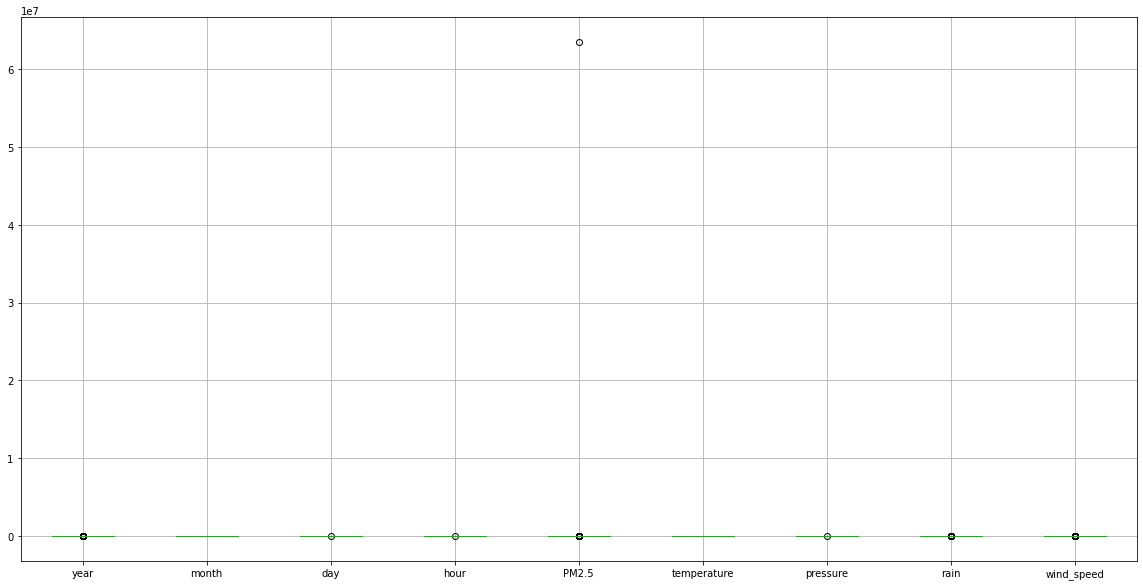

In [27]:
import seaborn as sns
plt.figure(figsize=(20,10))
newdata.boxplot()

<AxesSubplot:xlabel='year'>

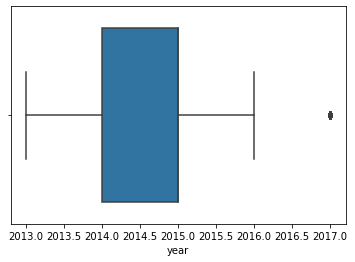

In [28]:
import seaborn as sns
sns.boxplot(x=newdata['year'])

***we can observe that there is only one outlier beyond 2017, but its out of index.***

<AxesSubplot:xlabel='month'>

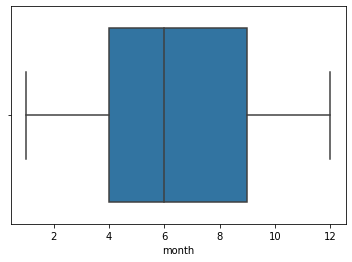

In [29]:
sns.boxplot(x=newdata['month'])

***Here, we can observe that there is no outlier in month column.***

<AxesSubplot:xlabel='day'>

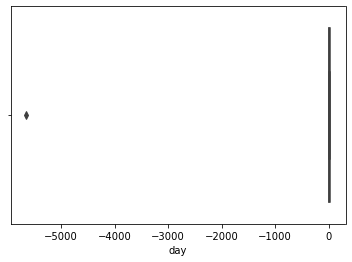

In [30]:
sns.boxplot(x=newdata['day'])

<AxesSubplot:xlabel='hour'>

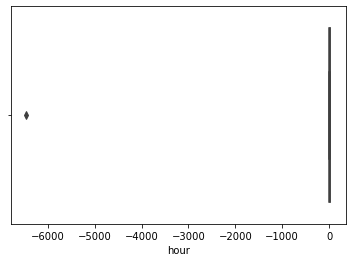

In [31]:
sns.boxplot(x=newdata['hour'])

<AxesSubplot:xlabel='PM2.5'>

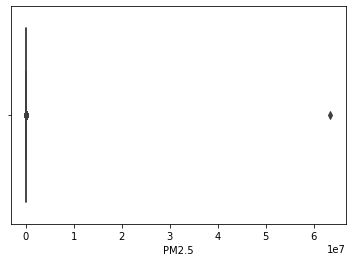

In [32]:
sns.boxplot(x=newdata['PM2.5'])

<AxesSubplot:xlabel='temperature'>

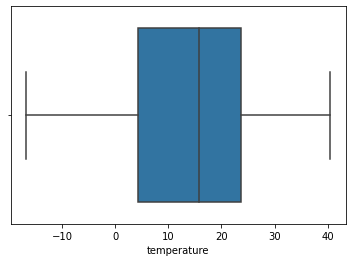

In [33]:
sns.boxplot(x=newdata['temperature'])

<AxesSubplot:xlabel='pressure'>

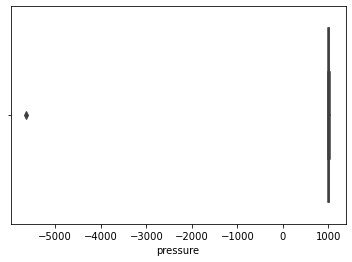

In [34]:
sns.boxplot(x=newdata['pressure'])

<AxesSubplot:xlabel='rain'>

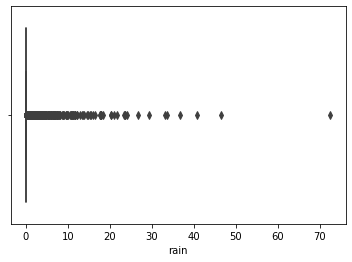

In [35]:
sns.boxplot(x=newdata['rain'])

**We can observe that there are lots of outliers in the rain column**

In [36]:
# sns.boxplot(x=newdata['wind_direction])

# it will throw error because the dtype of wind_direction is object

<AxesSubplot:xlabel='wind_speed'>

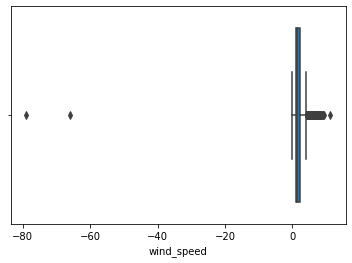

In [37]:
sns.boxplot(x=newdata['wind_speed'])

In [38]:
# Q1 = newdata['rain'].quantile(0.25)
# Q3 = newdata['rain'].quantile(0.75)
# IQR = Q3 - Q1    #IQR is interquartile range. 

# filter = (newdata['rain'] >= Q1 - 1.5 * IQR) & (newdata['rain'] <= Q3 + 1.5 *IQR)
# newdata.loc[filter] 

<AxesSubplot:xlabel='rain'>

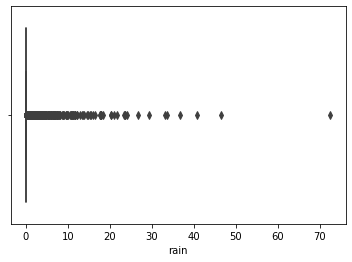

In [39]:
sns.boxplot(x=newdata['rain'])

In [40]:
newdata['rain'].quantile(0.75)

0.0

In [41]:
np.mean(newdata['rain'])

0.071742950486884

In [42]:
# newdata['rain']=np.where(newdata['rain']>newdata['rain'].quantile(0.95),newdata['rain'].median(),newdata['rain'])
# sns.boxplot(newdata['rain'])

In [45]:
newdata['rain']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31522    0.0
31523    0.0
31524    0.0
31525    0.0
31526    0.0
Name: rain, Length: 31527, dtype: float64

In [44]:
import scipy
newdata['rain'], fitted_lambda = scipy.stats.boxcox(newdata['rain'], lmbda=None)
sns.boxplot(x=newdata['rain'])

ValueError: Data must be positive.

### Finding correlation between columns and plotting heatmap

In [ ]:
# corr_year = newdata['year'].corr(other=newdata['month'])
cor = newdata.corr()
cor

In [ ]:
for i in range(0,8):
    for j in range(0,8):
        if(abs(cor.iloc[i,j])>0.8 and cor.iloc[i,j]!=1.0):
            print(cor.iloc[i,j])

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))

sns.heatmap(cor, annot=True, annot_kws={'size': 15}) # not using fmt, , fmt='.5g'

plt.show()

In [ ]:
# sns.pairplot(newdata ,hue='PM2.5')

First we will do label encoding of wind_direction since it is of object dtype.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdata['wind_direction_N'] = le.fit_transform(newdata['wind_direction'])

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
# newdata = np.array(ct.fit_transform(newdata))

In [ ]:
newdata

Now, let's extract or separate the values of other parameters (independent variables) with PM2.5 (dependent variable), which will help in training and testing.

In [ ]:
X=newdata[[
    'year',
    'month',
    'day',
    'hour',
    'temperature',
    'pressure',
    'rain',
    'wind_speed',
    'wind_direction_N'
]]

y = newdata['PM2.5']

In [ ]:
X

In [ ]:
X = X.drop(['year'], axis=1)
X = X.drop(['month'], axis=1)
X = X.drop(['day'], axis=1)
X = X.drop(['hour'], axis=1)

In [ ]:
X

Using train_test_split, we have splitted the 25% of dataset, in which 75% data is training dataset and 25% testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
#feature Scaling  (which will make all the values in same range)
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
# sc_y = StandardScaler()

X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  
# y_train = sc_y.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

In [ ]:
# from sklearn.linear_model import SGDRegressor

## Training and Fitting to the Training data

Now, using SVM regressor algorithm for trainig and fitting the model (which according to me is best from SGD regressor algo)

In [ ]:
# clf = SGDRegressor(loss="squared_loss", penalty="l2", max_iter=5)
# clf = SGDRegressor()
# clf.fit(X_train, y_train)

from sklearn.svm import SVR # "Support vector Regressor"  
reg = SVR(kernel = 'rbf')  
reg.fit(X_train, y_train)  

### WHY SVR?
### Beacause it creates easily a separation line or hyperplane between labels and features. Also SGD is good for linear regressors but SVR can also be used for non-linears, which is required here.

**Now predicting the value of PM2.5 and calculating the score(accuracy)**`

In [ ]:
y_pred= reg.predict(X_test)  
y_pred

In [ ]:
reg.score(X_test, y_test)

In [ ]:
# Y = SGDRegressor.predict(X_test)

In [ ]:
# from sklearn.metrics import r2_score
# r2_score(X_test, y_test)

In [ ]:
reg.score(X_test, y_test)*100

## Actual vs Predicted values

In [ ]:
comparison = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
print(comparison)

## Actual vs Predicted Graph

In [ ]:
A = y_test
B = y_pred
plt.rcParams['figure.figsize'] = 15,8
plt.figure()
plt.plot(A[-100:], label="Actual")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.xticks(())
plt.show()

## Predicting on our own value of attributes

In [ ]:
testSet = [[2015.0, 10.0, 18.0, 4.0, 17.0, 1018.8, 0.0, 2.4, 4]]
test = pd.DataFrame(testSet)
print(test)
print("predicted:", reg.predict(test))

## Evaluation of the model

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_absolute_error(y_test, y_pred))

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred)*100)

# DAY-7
# Task:
Predict PM 2.5 value in all the rows of test dataset.

In column PM 2.5 fill the predicted values and then rename dataset to test-dataset-<your team name>.csv 

Upload the renamed dataset and code on GitHub. 

In [ ]:
test = pd.read_csv("test_dataset.csv")
test.head(10)

In [ ]:
test.isnull().sum()

In [ ]:
test['temperature'].interpolate(method='linear', direction = 'both', inplace=True) 
test['pressure'].interpolate(method='linear', direction = 'both', inplace=True) 
test['rain'].interpolate(method='linear', direction = 'both', inplace=True) 
test["wind_speed"].fillna(test["wind_speed"].mean(),inplace=True)

In [ ]:
index = test["wind_direction"]
index.value_counts()

In [ ]:
test["wind_direction"] = test["wind_direction"].fillna("NE")

In [ ]:
test.isnull().sum()

In [ ]:
label=le.fit_transform(test["wind_direction"])
test["wind_direction"]=label
test["wind_direction"].value_counts()

In [ ]:
X= test.copy()

X=X.drop(columns=["PM2.5"])
X=X.reindex(["year","month","day","hour", "wind_speed","wind_direction","pressure",'rain',"temperature"],axis=1)
X

In [ ]:
Y= reg.predict(X)

In [ ]:
test["PM2.5"]=Y.astype("int")

In [ ]:
test.to_csv("test_predicted.csv")

In [ ]:
test.info()

# Day 8 - Day 9: Deployment and pushing the code on GitHub

## TASK
Deploy your model on web using flask. We have provided the resources for the same. 
The page should consist input boxes/entries and then will display the Predicted value on the same page.

Keep in mind that there should be entries for all the columns.

The deadline for the task is 21 September 8 AM.

You should upload the code for the deployment and the link of the web page where you have deployed the model.


In [ ]:
import pickle
filename='model.pkl'
pickle.dump(reg, open(filename, 'wb'))